In [20]:
import os
import pandas as pd
snmem="/gpfs/scratch/ahurtado/large_polar_low"
ahurt="/home/adrianhurtado/testing/madness-test-suite/large_polar_low/"
os.chdir(ahurt)
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from madnessReader import *
from daltonRunner import DaltonRunner
import matplotlib.pyplot as plt
dalton_reader = DaltonRunner()
dalton_reader.Np=4

4


In [21]:
basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']

In [22]:
#excluded=['C6H6']
#b=create_excited_comparison_data('d-aug-cc-pVQZ',excluded)
#display(b)

In [23]:
import json
converged=[]
not_converged=[]
not_found=[]
json_error=[]
for g in glob.glob('molecules/*.mol'):
    m = g.split('/')
    mol = m[1].split('.')[0]
    try:
        ben=FrequencyData(mol,'hf','dipole')
        if ben.converged.all():
            converged.append(mol)
        else:
            not_converged.append(mol)
    except FileNotFoundError as f:
        print(mol,f)
        not_found.append(mol)
    except json.decoder.JSONDecodeError as j:
        json_error.append(mol)
        print(mol,j)
        
            


LiH_s Expecting value: line 1 column 1 (char 0)
SH2 Expecting value: line 1 column 1 (char 0)
0.0525905  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/P2/dipole_hf_0-052590/response_base.json'
NaCN Expecting value: line 1 column 1 (char 0)
Na2 Expecting value: line 1 column 1 (char 0)
N2 Expecting value: line 1 column 1 (char 0)
SiH4 Expecting value: line 1 column 1 (char 0)
N2H2 Expecting value: line 1 column 1 (char 0)
NH3 Expecting value: line 1 column 1 (char 0)
N2H4 Expecting value: line 1 column 1 (char 0)
SiH3F Expecting value: line 1 column 1 (char 0)
SiO Expecting value: line 1 column 1 (char 0)
FNO [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/FNO/calc_info.json'
S2H2 [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/S2H2/calc_info.json'
LiCl Expecting value: line 1 column 1 (char 0)
PH3O Expecting

In [24]:
num_c=len(converged)
num_n=len(not_converged)
num_nf=len(not_found)
num_json_e=len(json_error)

total=num_c+num_n+num_nf+num_json_e
print("converged : ",num_c)
print("not converged : ",num_n)
print("not found : ",num_nf)
print("json error : ",num_json_e)
print("total : ",total)


converged :  27
not converged :  41
not found :  2
json error :  20
total :  90


In [25]:
converged

['LiH',
 'Li2',
 'NaCl',
 'C2H2',
 'BH3',
 'CH3SH',
 'P2',
 'CH3OH',
 'HBS',
 'CH3NH2',
 'He',
 'HF',
 'Mg2',
 'Ne',
 'H2',
 'HCl',
 'Mg',
 'CH2BH',
 'CH3BH2',
 'H2O',
 'Ar',
 'C6H6',
 'LiBH4',
 'CH4',
 'BeH2',
 'BH2F',
 'Be']

In [26]:
naughty_list='" "'.join(not_converged)
not_there_list='" "'.join(not_found)
display(not_there_list)

'FNO" "S2H2'

In [27]:
if False:
    for mol in not_converged:
        print(mol)
        d=display_convergence_plots(mol,'hf','dipole',False)
    
    
    
    

0.0525905  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/P2/dipole_hf_0-052590/response_base.json'
P2 converged:  0.0             True
0.0065738125    True
0.013147625     True
0.02629525      True
dtype: bool


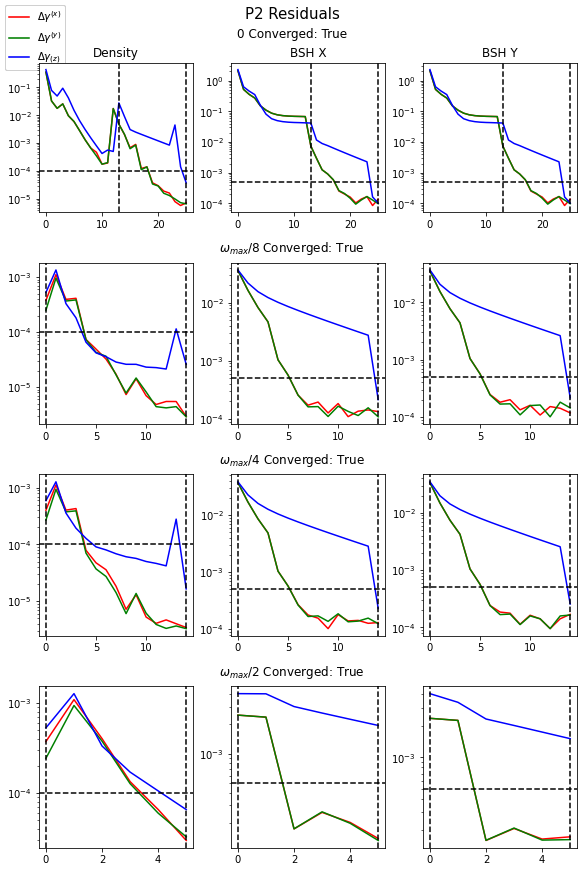

In [28]:

d=display_convergence_plots('P2','hf','dipole',False)
#create_polar_diff_plot('P2',d_basis_list[0:3])

In [10]:
display(naughty_list)


'CSO" "FCN" "P2H4" "OCl2" "HCONH2" "BH2Cl" "HCN" "C2H4" "SO2" "HNC" "F2" "NH3O" "HOF" "OF2" "ClF" "HCOOH" "CH3Cl" "HCHO" "SiH3Cl" "SF2" "HOCl" "HOOH" "HCCF" "BF" "BHF2" "HNS" "HBO" "Cl2" "LiCN" "CO" "CS" "CH2NH" "CH3F" "CO2" "ClCN" "HCHS" "SCl2" "HCCCl" "HNO" "HCP" "NOCl'

In [11]:
e28='" "'.join(json_error[0:8])
e24='" "'.join(json_error[8:14])
l28='" "'.join(json_error[14:20])
l24='" "'.join(json_error[20:26])


In [12]:
e28

'LiH_s" "SH2" "NaCN" "Na2" "N2" "SiH4" "N2H2" "NH3'

In [13]:
e24

'N2H4" "SiH3F" "SiO" "LiCl" "PH3O" "O3'

In [14]:
l28

'NH2Cl" "PH3" "NaLi" "NH2OH" "NaH" "NH2F'

In [15]:
l24

''

In [16]:

not_converged

['CSO',
 'FCN',
 'P2H4',
 'OCl2',
 'HCONH2',
 'BH2Cl',
 'HCN',
 'C2H4',
 'SO2',
 'HNC',
 'F2',
 'NH3O',
 'HOF',
 'OF2',
 'ClF',
 'HCOOH',
 'CH3Cl',
 'HCHO',
 'SiH3Cl',
 'SF2',
 'HOCl',
 'HOOH',
 'HCCF',
 'BF',
 'BHF2',
 'HNS',
 'HBO',
 'Cl2',
 'LiCN',
 'CO',
 'CS',
 'CH2NH',
 'CH3F',
 'CO2',
 'ClCN',
 'HCHS',
 'SCl2',
 'HCCCl',
 'HNO',
 'HCP',
 'NOCl']

In [17]:
display(len(not_converged))
display(not_converged)


41

['CSO',
 'FCN',
 'P2H4',
 'OCl2',
 'HCONH2',
 'BH2Cl',
 'HCN',
 'C2H4',
 'SO2',
 'HNC',
 'F2',
 'NH3O',
 'HOF',
 'OF2',
 'ClF',
 'HCOOH',
 'CH3Cl',
 'HCHO',
 'SiH3Cl',
 'SF2',
 'HOCl',
 'HOOH',
 'HCCF',
 'BF',
 'BHF2',
 'HNS',
 'HBO',
 'Cl2',
 'LiCN',
 'CO',
 'CS',
 'CH2NH',
 'CH3F',
 'CO2',
 'ClCN',
 'HCHS',
 'SCl2',
 'HCCCl',
 'HNO',
 'HCP',
 'NOCl']

CO converged:  0.0             False
0.0201593125    False
0.040318625     False
0.08063725      False
0.1612745       False
dtype: bool


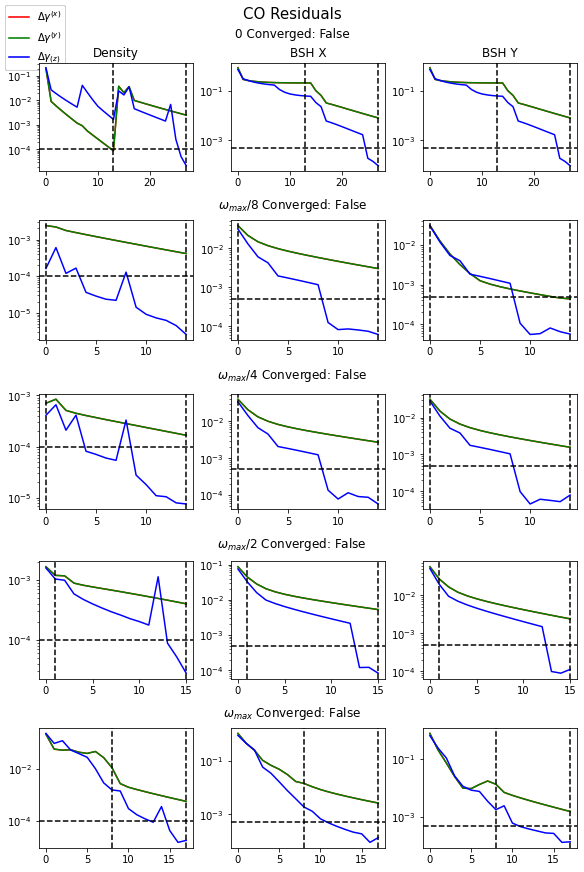

In [18]:
display_convergence_plots('CO','hf','dipole',False)

In [19]:

if False:
    for mol in converged:
        create_polar_diff_plot(mol,d_basis_list[0:3])